# Flight Price Prediction

#### Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records




FEATURES:



Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

##### Importing Libraries

In [1]:
import pandas  as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import scipy as stats

import warnings
warnings.filterwarnings('ignore')

#### Importing Training Data

In [2]:
#Importing the Training Dataset

df_train=pd.read_excel('Flight_Ticket_Participant_Datasets/Data_Train.xlsx')
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df_train.shape

(10683, 11)

I have imported the training dataset. Training dataset contains 10683 rows and 11 column. Price is our target variable.

# Exploratory Data Analysis (EDA)

In [4]:
# To get overview of the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Looking at the overview of the dataset, only one integer coloumn which is 'Price'. Remaining all columns are object type

The columns Date_of_Journey, Dept_Time and Arrival_Time showing object data type which means python is not able to understand the type of data in this column.

Therefore, we have to convert this datatype into timestamp to use them properly for prediction.

In [7]:
def date_bifurcation(df):
    df=df.copy()
    df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
    df['Year_of_Journey']=df['Date_of_Journey'].dt.year
    df['Month_of_Journey']=df['Date_of_Journey'].dt.month
    df['Day_of_Journey']=df['Date_of_Journey'].dt.day    
    return df

df_train = date_bifurcation(df_train)
print(f"Rows and Columns:", df_train.shape)
df_train.head()

Rows and Columns: (10683, 14)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year_of_Journey,Month_of_Journey,Day_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3


Now we have splitted Date_of_Journey column into 3 new column of Year, Month and Day of Journey. All 3 new columns are integers data type. We can now drop the Date_of_Journey column.

In [8]:
df_train.drop('Date_of_Journey',axis=1, inplace=True)

In [9]:
df_train.drop('Duration',axis=1, inplace=True)

Dropping the Duration column as we ill deal with time separation of Departure and Arrival column.

In [10]:
def time_bifurcation(df):
    df['Departure_hour']=pd.to_datetime(df['Dep_Time']).dt.hour
    df['Departure_minute']=pd.to_datetime(df['Dep_Time']).dt.minute
    df=df.drop(['Dep_Time'],axis=1)
    df['Arrival_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
    df['Arrival_minute']=pd.to_datetime(df['Arrival_Time']).dt.minute
    df=df.drop(['Arrival_Time'],axis=1)
    return df

df_train = time_bifurcation(df_train)
print(f"Rows and Columns:", df_train.shape)
df_train.head()

Rows and Columns: (10683, 14)


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Year_of_Journey,Month_of_Journey,Day_of_Journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,2019,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,2019,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,2019,1,3,16,50,21,35


Now the trained data contains 10683 rows and 15 columns

Let's check the list of value counts in each columns

In [7]:
# Checking the value counts of each columns
for i in df_train.columns:
        print(df_train[i].value_counts())
        print('*'*60)

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
************************************************************
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
************************************************************
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
************************************************************
DEL → BOM → COK          2376
BLR

In [8]:
# Checking count of null values from the dataset.
df_train.isnull().sum()

Airline             0
Source              0
Destination         0
Route               1
Total_Stops         1
Additional_Info     0
Price               0
Year_of_Journey     0
Month_of_Journey    0
Day_of_Journey      0
Departure_hour      0
Departure_minute    0
Arrival_hour        0
Arrival_minute      0
dtype: int64

From above, we can see that null values present in Route and Total_Stops column. Both are having Catagorical data and we will fill the null values using mode method

In [11]:
# Filling missing values in Route by its mode DEL → BOM → COK
df_train["Route"] = df_train["Route"].fillna(df_train["Route"].mode()[0])

# Filling missing values in Total_Stops by its mode 1 stop
df_train["Total_Stops"] = df_train["Total_Stops"].fillna(df_train["Total_Stops"].mode()[0])

In [10]:
# Checking count of null values again after applying imputation technique
df_train.isnull().sum()

Airline             0
Source              0
Destination         0
Route               0
Total_Stops         0
Additional_Info     0
Price               0
Year_of_Journey     0
Month_of_Journey    0
Day_of_Journey      0
Departure_hour      0
Departure_minute    0
Arrival_hour        0
Arrival_minute      0
dtype: int64

From above, we can see that there are no missing values in the dataset.

<AxesSubplot:>

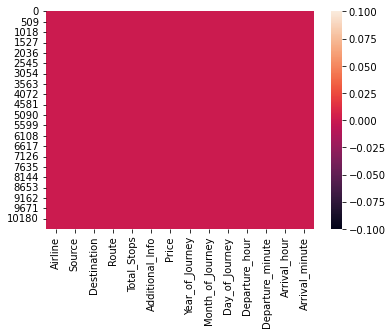

In [17]:
# Let's visualize the null values clearly through Heatmap
sns.heatmap(df_train.isnull())

Let's see if any duplicate value present in our dataset and drop it.

In [12]:
print(f"Rows and Columns before dropping duplicates: ", df_train.shape)
df_train.drop_duplicates(inplace=True)
print(f"Rows and Columns after dropping duplicates: ", df_train.shape)

Rows and Columns before dropping duplicates:  (10683, 14)
Rows and Columns after dropping duplicates:  (10460, 14)


We have removed 223 duplicate rows.

In [12]:
df_train.nunique().to_frame("Unique Values")

,Unique Values
Airline,12
Source,5
Destination,6
Route,128
Total_Stops,5
Additional_Info,10
Price,1870
Year_of_Journey,1
Month_of_Journey,7
Day_of_Journey,9


In [13]:
df_train.drop('Year_of_Journey',axis=1, inplace=True)

Dropping 'Year_of_Journey' as it has only 1 value.

In [14]:
# Checking the list of counts in target columns
df_train['Price'].value_counts()

10262    258
10844    212
7229     161
4804     160
4823     131
        ... 
8925       1
11774      1
16497      1
8853       1
12648      1
Name: Price, Length: 1870, dtype: int64

In [15]:
# Statistical summary of dataset
df_train.describe()

,Price,Month_of_Journey,Day_of_Journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
count,10460.000000,10460.000000,10460.000000,10460.000000,10460.000000,10460.000000,10460.000000
mean,9026.278298,5.535373,12.630115,12.477055,24.408222,13.389197,24.720841
std,4624.094942,2.995326,8.791081,5.725879,18.818066,6.854034,16.568444
min,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,5224.000000,3.000000,5.000000,8.000000,5.000000,8.000000,10.000000
50%,8266.000000,5.000000,6.000000,11.000000,25.000000,14.000000,25.000000
75%,12342.250000,6.000000,21.000000,18.000000,40.000000,19.000000,35.000000
max,79512.000000,12.000000,27.000000,23.000000,55.000000,23.000000,55.000000


By looking at the above statistics, Target variable 'Price' has huge data variance between mean and max. Mean value is greater than the median(50%) in the columns Price, Day_of_Journey, Departure_hour so we can say they are skewed to right. Median(50%) is bit greater than mean in Departure_minute, Arrival_hour and Arrival_minute which means they are skewed to left.

Now Let's separate the Numerical and Catagorical columns

In [14]:
Catg_data = []
for x in df_train.dtypes.index:
    if df_train.dtypes[x] == 'object':
        Catg_data.append(x)
Catg_data

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

These are the categorical columns in the given dataset.

In [15]:
Num_data = []
for x in df_train.dtypes.index:
    if df_train.dtypes[x] !='object':
        Num_data.append(x)
Num_data

['Price',
 'Month_of_Journey',
 'Day_of_Journey',
 'Departure_hour',
 'Departure_minute',
 'Arrival_hour',
 'Arrival_minute']

These are the numerical columns present in the dataset.

## Data Visualisation

##### Univariate Aanalysis

Text(0, 0.5, 'Counts')

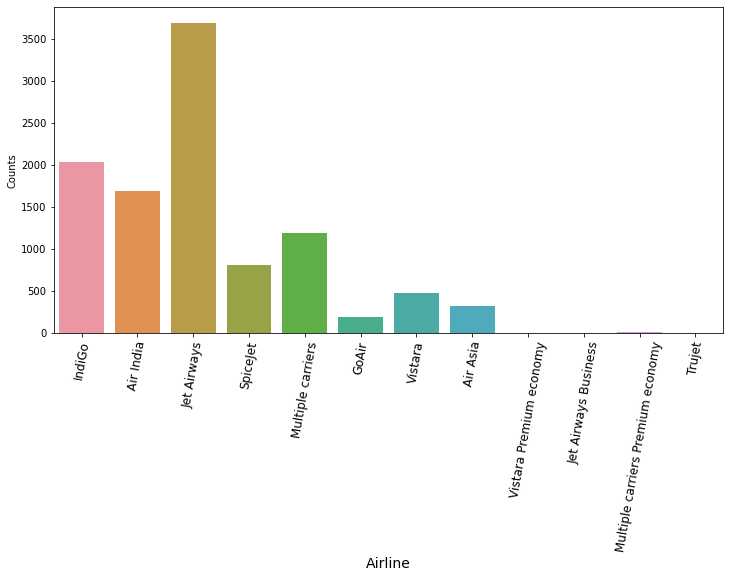

In [25]:
# Visualizing the various Airlines present in the dataset through count plot.
plt.figure(figsize= (12,6))
sns.countplot(df_train['Airline'])
plt.xlabel('Airline', fontsize=14)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.ylabel('Counts')

Jet Airways has the maximum no of flights

Text(0, 0.5, 'Counts')

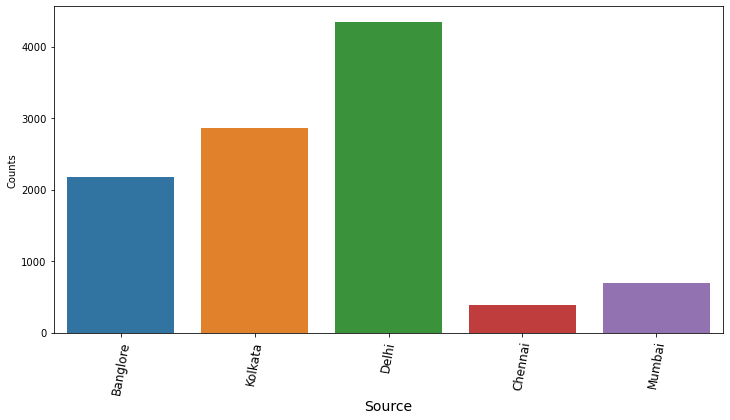

In [26]:
# Visualizing the source from which place the service begins 
plt.figure(figsize= (12,6))
sns.countplot(df_train['Source'])
plt.xlabel('Source', fontsize=14)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.ylabel('Counts')

From Delhi, maximum no of flights begins

Text(0, 0.5, 'Counts')

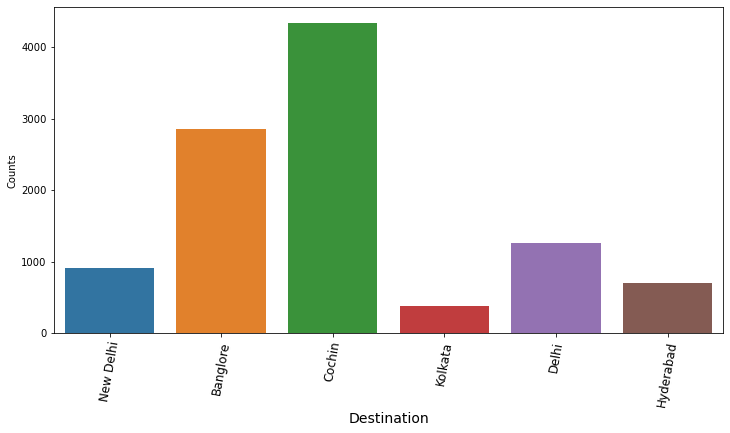

In [27]:
# Visualizing the destination where the service ends 
plt.figure(figsize= (12,6))
sns.countplot(df_train['Destination'])
plt.xlabel('Destination', fontsize=14)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.ylabel('Counts')


Maximum flight destination is Cochin

Text(0, 0.5, 'Counts')

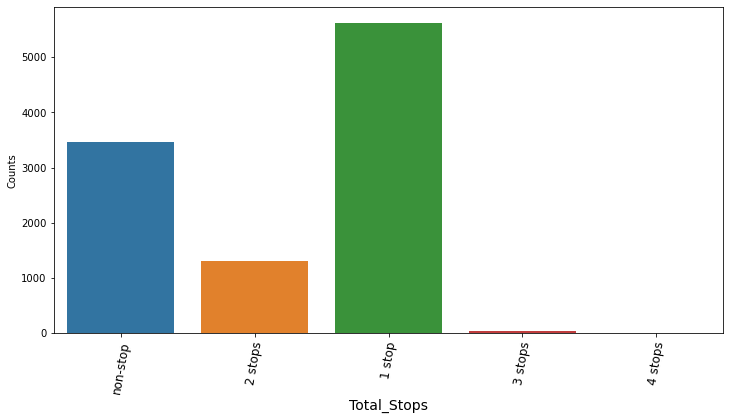

In [28]:
# Visualizing the Total Stops between the source and the destination

plt.figure(figsize= (12,6))
sns.countplot(df_train['Total_Stops'])
plt.xlabel('Total_Stops', fontsize=14)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.ylabel('Counts')

The count is high in 1 stop followed by non-stop

##### Bivariate Analysis

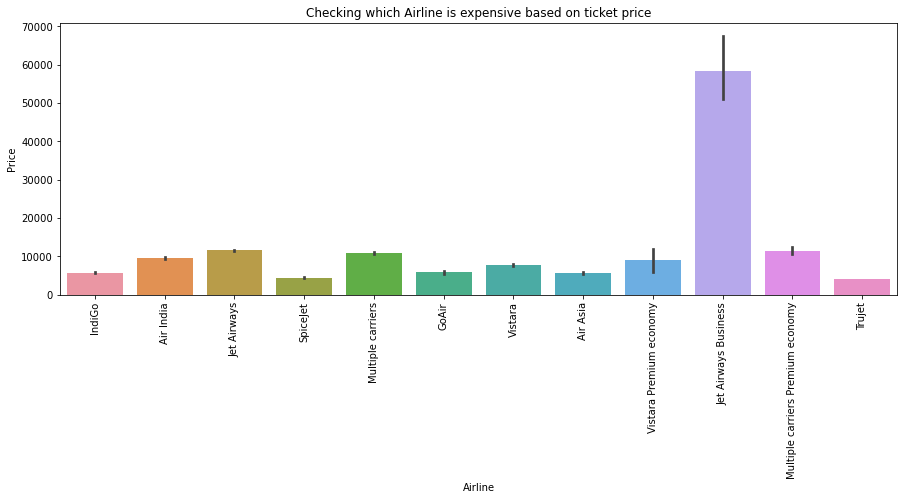

In [40]:
# Let's check which Airline is expensive based on Price of tickets

plt.figure(figsize=(15,5))
sns.barplot(df_train["Airline"],df_train["Price"],data=df_train)
plt.title("Checking which Airline is expensive based on ticket price")
plt.xticks(rotation=90)
plt.show()

The bar plot shows that the Jet Airways Business class flight is most expensive Airline

<AxesSubplot:xlabel='Source', ylabel='Price'>

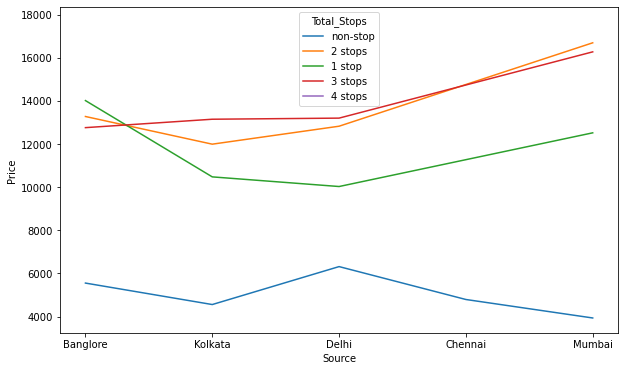

In [34]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Source', y='Price', hue='Total_Stops', data=df_train, ci=None)

From above line plot, we can see that Non-stop flight have lower price irrespective of the source.

<AxesSubplot:xlabel='Destination', ylabel='Price'>

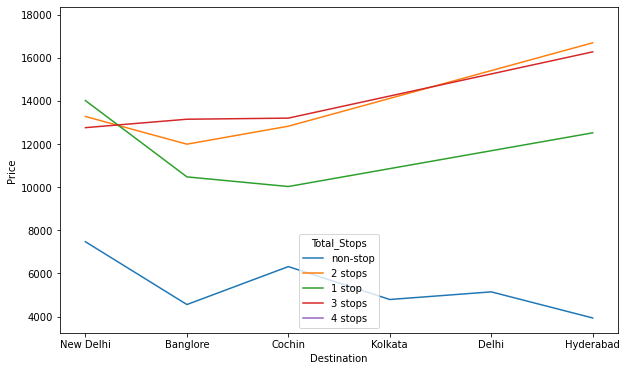

In [35]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Destination', y='Price', hue='Total_Stops', data=df_train, ci=None)

From above line plot, we can see that Non-stop flight have lower price irrespective of the Destination.

<AxesSubplot:xlabel='Month_of_Journey', ylabel='Price'>

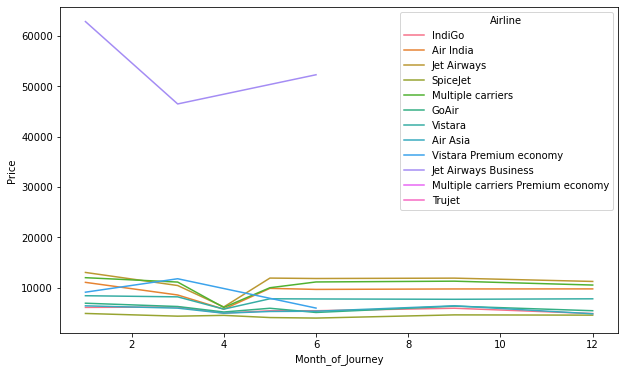

In [36]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Month_of_Journey', y='Price', hue='Airline', data=df_train, ci=None)

In the above line plot we see that Jet Airways Business class has the highest price than the rest.Jet Airways economy has the lowest price

<AxesSubplot:xlabel='Day_of_Journey', ylabel='Price'>

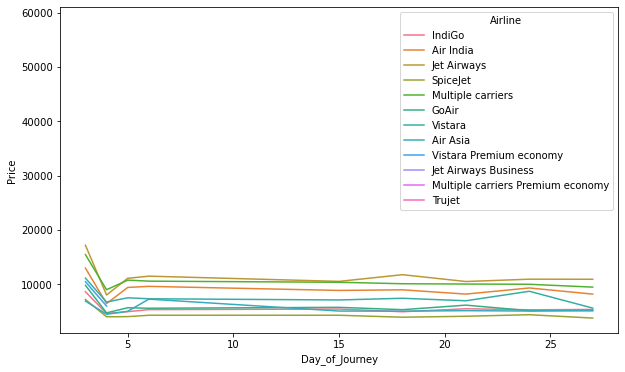

In [37]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Day_of_Journey', y='Price', hue='Airline', data=df_train, ci=None)

In the above line plot we see that all the airlines have high price between 1-5 days of a month and that reduces a bit on rest of the days apart from them.

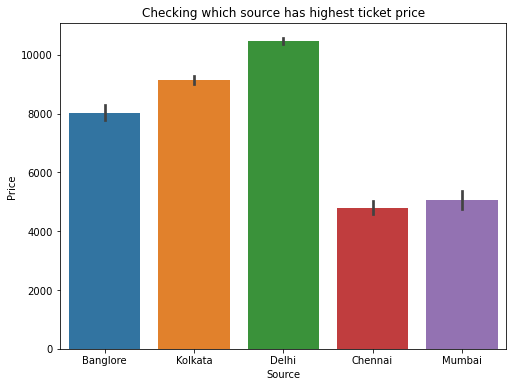

In [38]:
plt.figure(figsize=(8,6))
sns.barplot(df_train["Source"],df_train["Price"],data=df_train)
plt.title("Checking which source has highest ticket price")
plt.show()

The tickes prices are expensive in Delhi region compared to others and price is cheaper in Chennai followed by Mumbai sources.

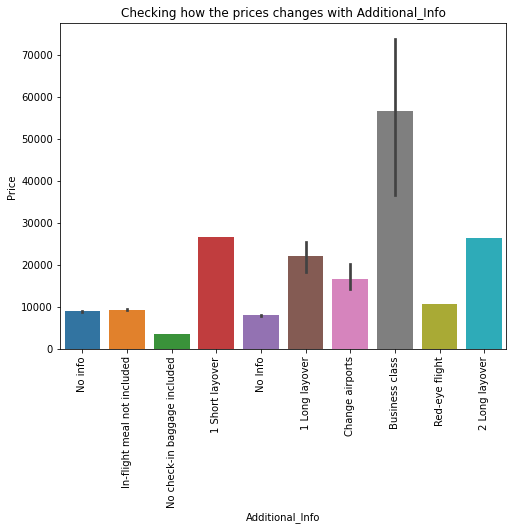

In [39]:
plt.figure(figsize=(8,6))
sns.barplot(df_train["Additional_Info"],df_train["Price"],data=df_train)
plt.title("Checking how the prices changes with Additional_Info")
plt.xticks(rotation=90)
plt.show()

The plot shows that the Business class flights are more expensive compared to others and the flights having the class No check-in baggage included has very least ticket price.

##### Multivariate Analysis

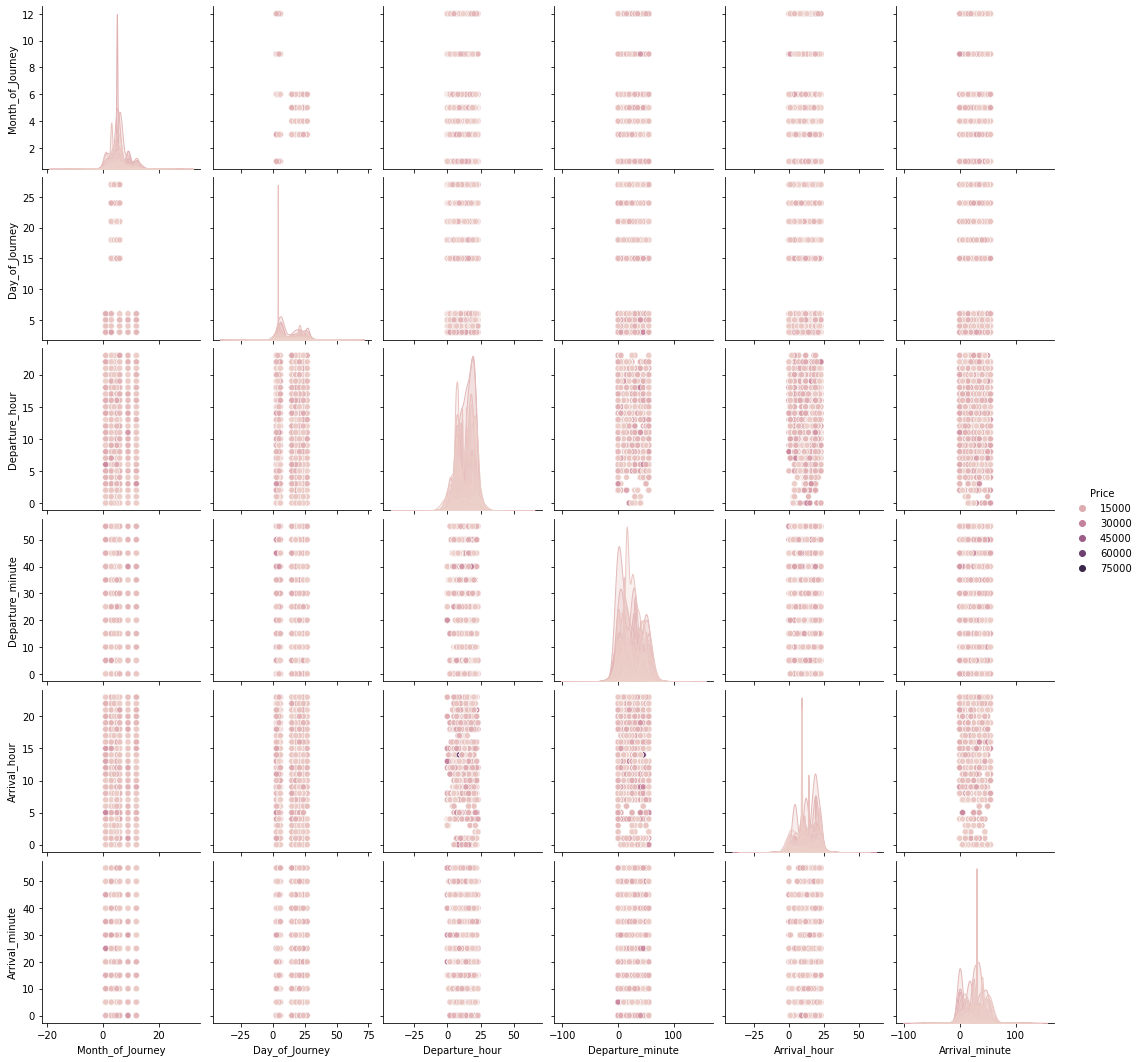

In [18]:
#Pair plot
sns.pairplot(df_train,hue="Price")

This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "Price". Here we can observe the relation between the features and label. Here we can observe the correaltion between the features and on the diagonal we cna notice hte distribution plot which shows whether the column has skewness or not

## Outliers

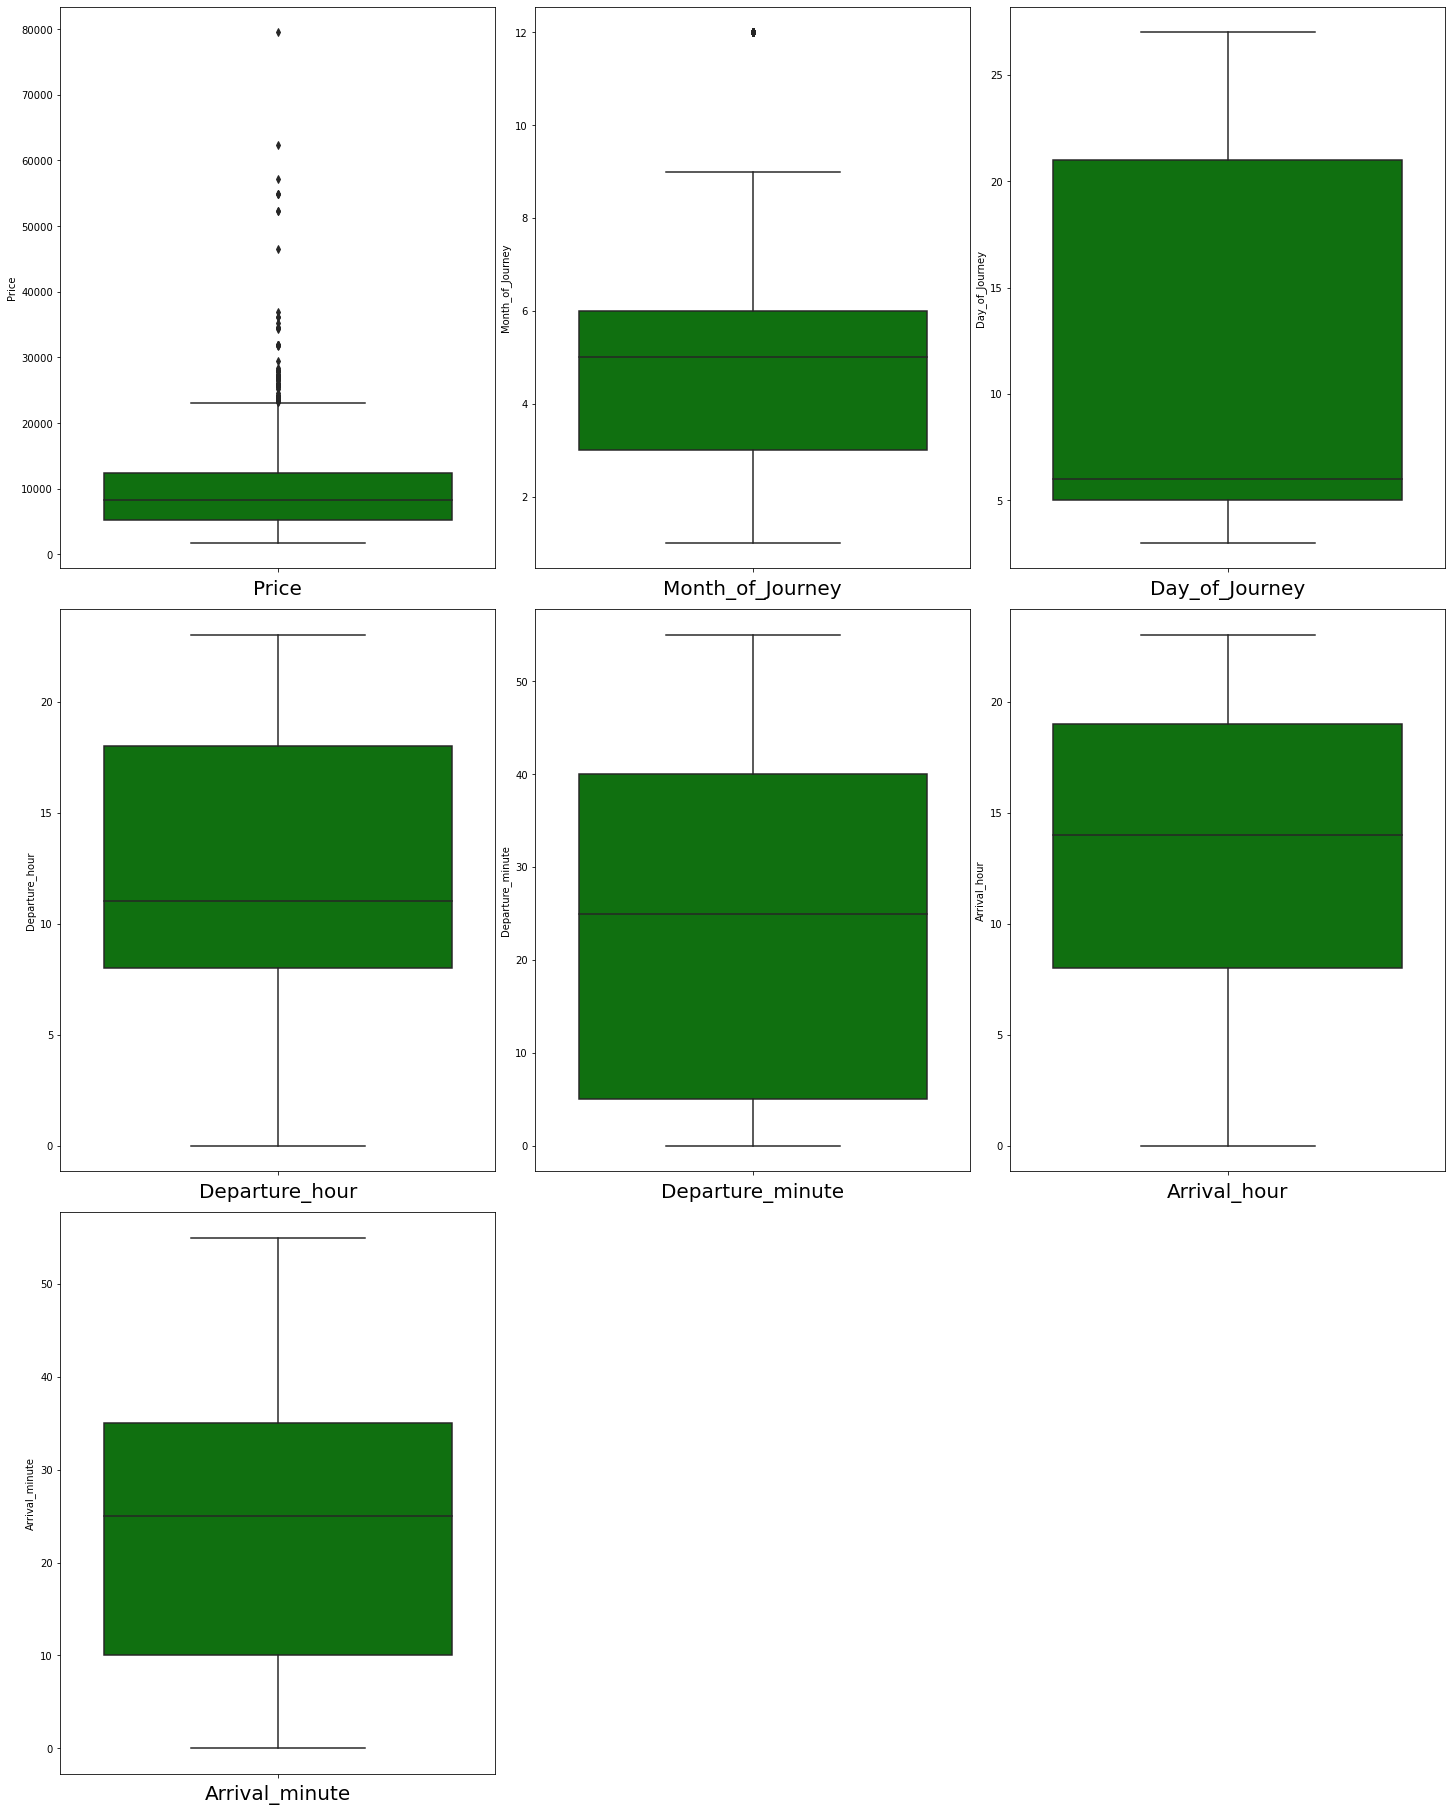

In [19]:
#Let's check the Outliers through Boxplot

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in Num_data:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(y=column, data=df_train,color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

From above Box plot we can see Outliers present only in column 'Month_of_Jurney', we will ignore this. We will ignore Outliers for 'Price' column as this is our target variable.

## Skewness

In [20]:
# Checking the skewness
df_train.skew()

Price               1.858274
Month_of_Journey    0.630415
Day_of_Journey      0.376107
Departure_hour      0.108440
Departure_minute    0.170923
Arrival_hour       -0.378864
Arrival_minute      0.110589
dtype: float64

We can see very little skewness of column 'Month_of_Journey'. Like outliers we will ignore this. Price is our Label data so we will ignore skewness in Price column.

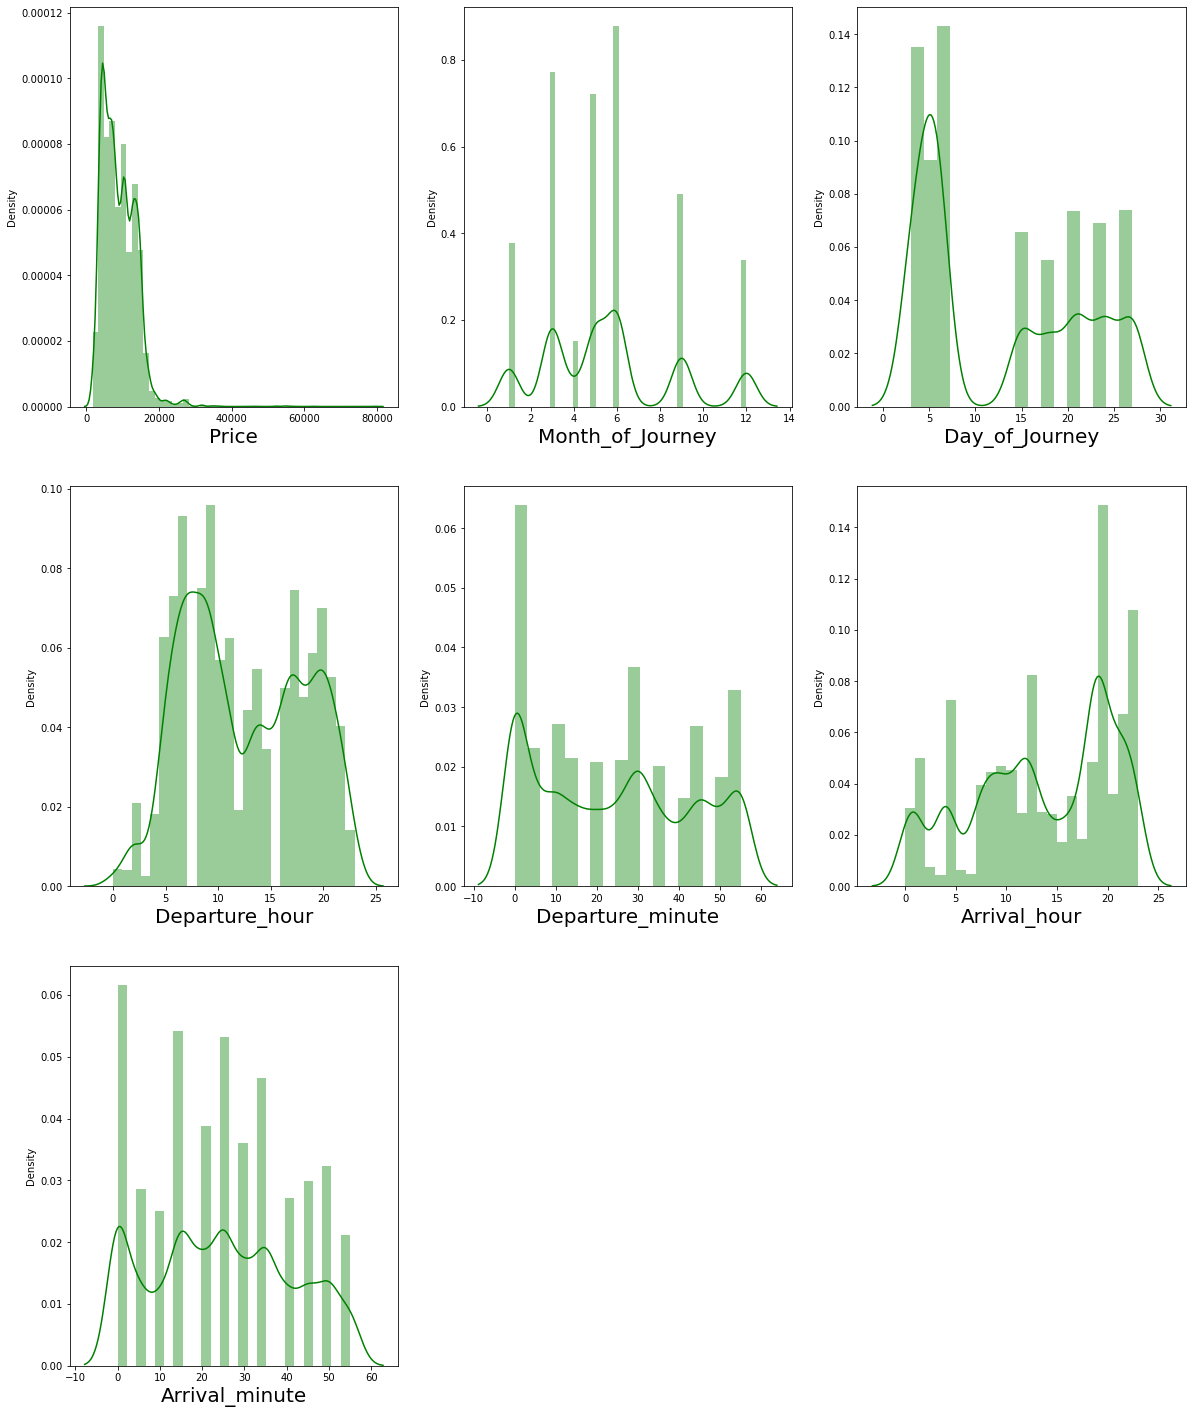

In [21]:
#Checking the skewness through Dist plot

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in Num_data:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_train[column],color='g')
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

## Encoding

##### Encoding of categorical columns using label encoding method

In [16]:
Catag_data = ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [17]:
# Encoding data using label encoding method
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_train[Catag_data]= df_train[Catag_data].apply(le.fit_transform)
df_train

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Month_of_Journey,Day_of_Journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,3,0,5,18,4,8,3897,3,24,22,20,1,10
1,1,3,0,84,1,8,7662,1,5,5,50,13,15
2,4,2,1,118,1,8,13882,9,6,9,25,4,25
3,3,3,0,91,0,8,6218,12,5,18,5,23,30
4,3,0,5,29,0,8,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,4,8,4107,9,4,19,55,22,25
10679,1,3,0,64,4,8,4145,4,27,20,45,23,20
10680,4,0,2,18,4,8,7229,4,27,8,20,11,20
10681,10,0,5,18,4,8,12648,1,3,11,30,14,10


Now all object type data is converted to numerical format.

### Correlation using HEAT map

In [24]:
cor = df_train.corr()
cor

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Month_of_Journey,Day_of_Journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
Airline,1.000000,-0.012048,0.015794,0.029682,0.034397,-0.058344,-0.036558,-0.008633,0.032513,-0.032282,-0.062383,-0.005157,-0.072944
Source,-0.012048,1.000000,-0.589714,0.403605,-0.222515,-0.021437,0.013591,0.062502,0.007868,0.060780,-0.056734,0.027699,0.021070
Destination,0.015794,-0.589714,1.000000,-0.457213,0.333709,0.024707,-0.065563,-0.104285,-0.051886,-0.074907,0.128729,-0.043775,0.016885
Route,0.029682,0.403605,-0.457213,1.000000,-0.435870,0.042950,0.154024,0.039859,0.094620,-0.074659,-0.071020,0.020976,-0.174710
Total_Stops,0.034397,-0.222515,0.333709,-0.435870,1.000000,0.164510,-0.571980,-0.055351,0.045268,0.039901,0.049359,-0.098851,0.177122
Additional_Info,-0.058344,-0.021437,0.024707,0.042950,0.164510,1.000000,-0.068854,-0.008128,-0.019538,-0.059552,-0.015830,0.021410,0.044359
Price,-0.036558,0.013591,-0.065563,0.154024,-0.571980,-0.068854,1.000000,0.008726,-0.170875,0.005658,-0.024222,0.030712,-0.086632
Month_of_Journey,-0.008633,0.062502,-0.104285,0.039859,-0.055351,-0.008128,0.008726,1.000000,-0.265354,0.028629,0.001881,-0.003290,-0.023671
Day_of_Journey,0.032513,0.007868,-0.051886,0.094620,0.045268,-0.019538,-0.170875,-0.265354,1.000000,-0.007779,-0.013686,-0.001010,-0.019486
Departure_hour,-0.032282,0.060780,-0.074907,-0.074659,0.039901,-0.059552,0.005658,0.028629,-0.007779,1.000000,-0.015029,-0.003138,0.073544


Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

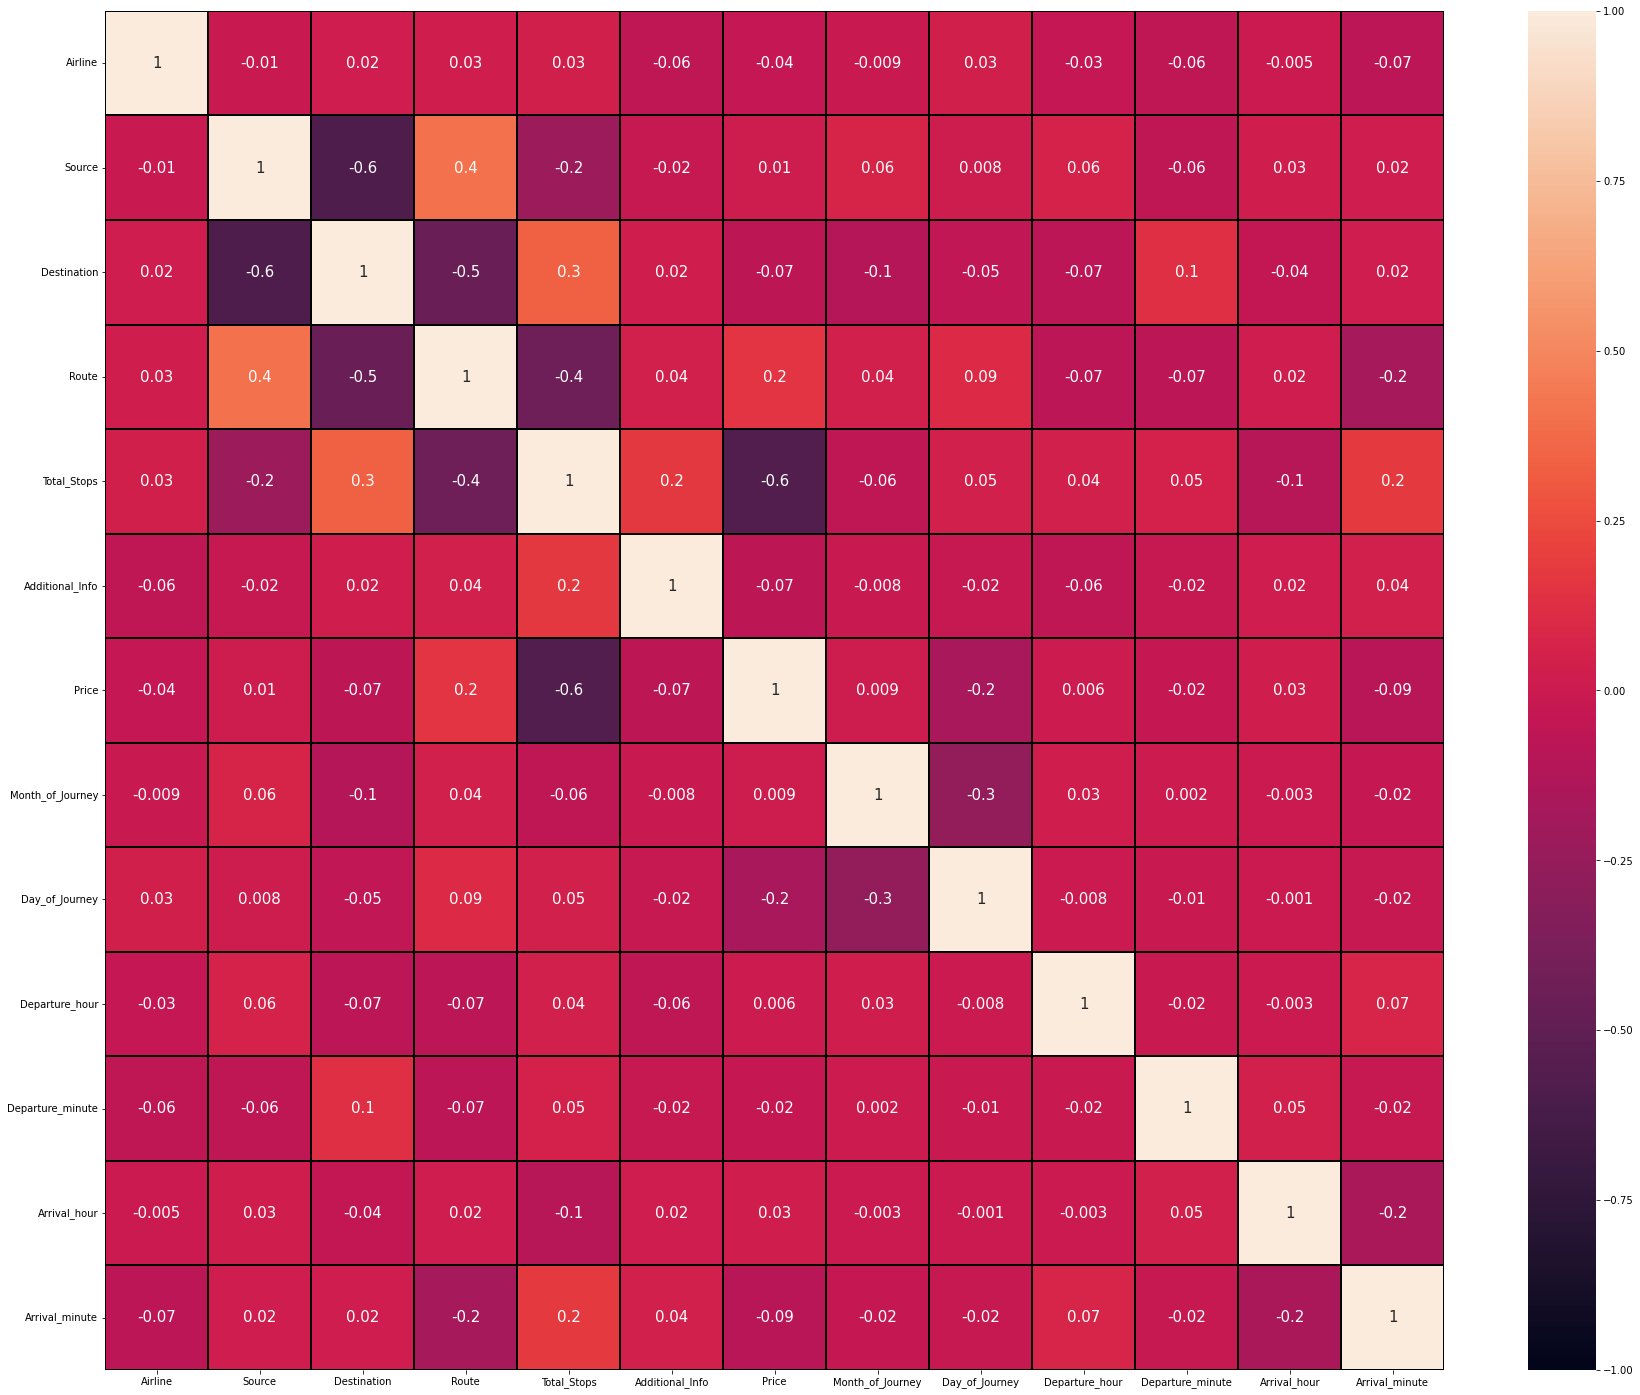

In [25]:
plt.figure(figsize=(30,25))
sns.heatmap(df_train.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', linecolor='black', annot = True, annot_kws={'size':15})
plt.yticks(rotation=0);

With the help of about heatmap we are able to notice the correlation details between our label and feature and also amongst our labels. After checking the above heatmap we can see that there are no multi collinearity concerns in our dataset so we won't have to worry about dealing with them.

##### Correlation Bar Plot comparing features with our label

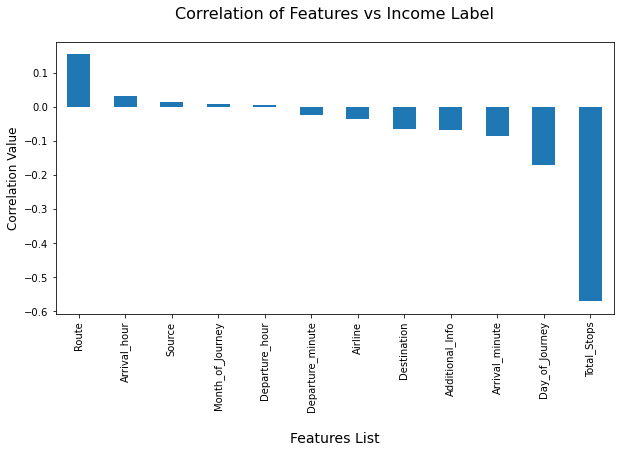

In [26]:
df_corr = df_train.corr()
plt.figure(figsize=(10,5))
df_corr['Price'].sort_values(ascending=False).drop('Price').plot.bar()
plt.title("Correlation of Features vs Income Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

From above bar plot, we can see that only columns Route, arrival hour, source, month of journey and departure hours are positively correlated with our target and remaining all our feature columns are negatively correlated where total stops is highly negatively correlated.

### Separating the independent and target variables into x and y

In [18]:
x = df_train.drop('Price', axis=1)
y = df_train['Price']

##### Scaling data with standard scaler

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Month_of_Journey,Day_of_Journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,-0.414826,-1.647462,2.405773,-1.533953,1.393321,0.498023,-0.846484,1.293405,1.663221,-0.234266,-1.807664,-0.888529
1,-1.260897,0.881887,-0.971997,0.264403,-0.253971,0.498023,-1.514222,-0.867980,-1.305898,1.360023,-0.056786,-0.586736
2,0.008210,0.038770,-0.296443,1.190829,-0.253971,0.498023,1.156733,-0.754223,-0.607282,0.031449,-1.369945,0.016850
3,-0.414826,0.881887,-0.971997,0.455138,-0.803068,0.498023,2.158341,-0.867980,0.964605,-1.031410,1.402278,0.318643
4,-0.414826,-1.647462,2.405773,-1.234227,-0.803068,0.498023,-1.514222,-1.095494,0.615296,1.360023,1.110465,0.620435


This is our scaled data using standard scaler.

#### Variance Inflation Factor(VIF)

From heatmap, we have checked there is no multicollinearity issue, still conforming this though VIF

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"]=x.columns
vif["VIF Value"]=[variance_inflation_factor(x.values, i)for i in range(len(x.columns))]
vif

,Features,VIF Value
0,Airline,1.020851
1,Source,1.607780
2,Destination,1.782725
3,Route,1.583812
4,Total_Stops,1.376795
5,Additional_Info,1.061832
6,Month_of_Journey,1.094237
7,Day_of_Journey,1.106259
8,Departure_hour,1.031130
9,Departure_minute,1.026610


Here we can notice the VIF value is less than 10 in all the columns. We are free from multicollinearity problem now so let's move to build our machine learning models.

# Modeling

### Finding best random state

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [22]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9261682567113546  on Random_state  71


So, here we are getting the maximum r2 score as 92.61% on the random state 71.

### Feature Importance

,Importance
Features,
Total_Stops,0.426
Airline,0.135
Day_of_Journey,0.134
Month_of_Journey,0.072
Additional_Info,0.061
Route,0.051
Arrival_hour,0.034
Departure_hour,0.028
Departure_minute,0.025


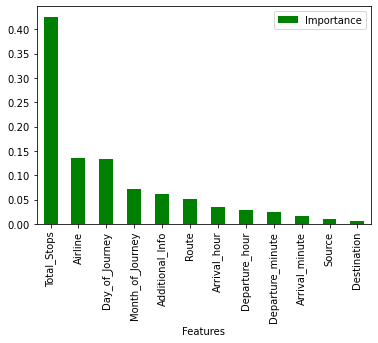

In [18]:
# Lets ckeck the feature importance using Random Forest Regressor

RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(RFR.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='g')
importances

Now splitting the data for Training and Testing purpose. 70% we are considering for Training and 30% for Testing purpose

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

## Applying Regression Algorithms

#### Importing all the Regression Algorithms

In [20]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

### Random Forest Regressor

In [29]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('Mean abs error:',mean_absolute_error(y_test, predRFR))
print('Mean squared error:',mean_squared_error(y_test, predRFR))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, predRFR)))

# Checking cv score for Random Forest Regression
print("The CV  score for  the Random forest regressor is:",cross_val_score(RFR,x,y,cv=6).mean())

R2_Score: 0.925742594923967
Mean abs error: 626.7804682052245
Mean squared error: 1455422.2162505032
Root Mean squared error(RMSE): 1206.4088097533536
The CV  score for  the Random forest regressor is: 0.8902165430931329


### Decision Tree Regressor

In [30]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR))
print('Mean abs error:',mean_absolute_error(y_test, predDTR))
print('Mean squared error:',mean_squared_error(y_test, predDTR))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, predDTR)))

# Checking cv score for Decision Tree Regression
print('The CV score  for  the Decision Tree Regression is :',cross_val_score(DTR,x,y,cv=6).mean())

R2_Score: 0.8692670830046474
Mean abs error: 693.6299128956874
Mean squared error: 2562324.8158947667
Root Mean squared error(RMSE): 1600.7263401015075
The CV score  for  the Decision Tree Regression is : 0.8032378049439123


### Gradient Boosting Regressor

In [31]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)

#prediction
predGBR=GBR.predict(x_test)
print('R2_Score:',r2_score(y_test,predGBR))
print('Mean abs error:',mean_absolute_error(y_test, predGBR))
print('Mean squared error:',mean_squared_error(y_test, predGBR))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, predGBR)))

# Checking cv score for GBR Regression
print('The  CV score for the GradientBoosting  regressor is :',cross_val_score(GBR,x,y,cv=6).mean())

R2_Score: 0.8379461107550574
Mean abs error: 1247.4100719059727
Mean squared error: 3176206.203211538
Root Mean squared error(RMSE): 1782.1914047631185
The  CV score for the GradientBoosting  regressor is : 0.8225395255631925


### Bagging Regressor

In [32]:
BR=BaggingRegressor()
BR.fit(x_train,y_train)

#prediction
predBR=BR.predict(x_test)
print('R2_Score:',r2_score(y_test,predBR))
print('Mean abs error:',mean_absolute_error(y_test, predBR))
print('Mean squared error:',mean_squared_error(y_test, predBR))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, predBR)))

# Checking cv score for Bagging Regression
print('The  CV score for the Bagging  regressor is :',cross_val_score(BR,x,y,cv=6).mean())

R2_Score: 0.9162472762534866
Mean abs error: 657.4052239066436
Mean squared error: 1641527.5309897575
Root Mean squared error(RMSE): 1281.2211093288142
The  CV score for the Bagging  regressor is : 0.8829522984847537


### Extra Trees Regressor

In [33]:
XT=ExtraTreesRegressor()
XT.fit(x_train,y_train)

#prediction
predXT=XT.predict(x_test)
print('R2_Score:',r2_score(y_test,predXT))
print('Mean abs error:',mean_absolute_error(y_test, predXT))
print('Mean squared error:',mean_squared_error(y_test, predXT))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, predXT)))

# Checking cv score for Extra Tree Regression
print('The  CV score for the Extra Tree  regressor is :',cross_val_score(XT,x,y,cv=6).mean())

R2_Score: 0.9105695690462221
Mean abs error: 627.2170182706608
Mean squared error: 1752808.8395455473
Root Mean squared error(RMSE): 1323.9368714351706
The  CV score for the Extra Tree  regressor is : 0.8886378631366817


### XGB Regressor

In [34]:
from xgboost import XGBRegressor as xgb

XGB=xgb(verbosity=0)
XGB.fit(x_train,y_train)

#prediction
predXGB=XGB.predict(x_test)
print('R2_Score:',r2_score(y_test,predXGB))
print('Mean abs error:',mean_absolute_error(y_test, predXGB))
print('Mean squared error:',mean_squared_error(y_test, predXGB))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, predXGB)))

# Checking cv score for Extra Tree Regression
print('The  CV score for the Extra Tree  regressor is :',cross_val_score(XGB,x,y,cv=6).mean())

R2_Score: 0.9234622846590675
Mean abs error: 703.4684452521261
Mean squared error: 1500115.5935114059
Root Mean squared error(RMSE): 1224.792061335885
The  CV score for the Extra Tree  regressor is : 0.9035385190603776


From the above observation, looking at the difference of R2 score and the cross validation score we conclude that XGB Regressor is our best fitting model

## Hyperparameter tuning

In [37]:
from sklearn.model_selection import GridSearchCV

In [35]:
#XGB Regressor
parameters = {'n_estimators' : [50,100,200,400],
              'gamma' : np.arange(0,0.5,0.1),
              'max_depth' : [4, 6, 8,10],
              'n_jobs' : [-2, -1, 1]}


In [38]:
GCV=GridSearchCV(xgb(),parameters,cv=5)

In [39]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...elta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                   

In [40]:
GCV.best_params_

{'gamma': 0.0, 'max_depth': 6, 'n_estimators': 200, 'n_jobs': -2}

In [41]:
Final_model = xgb(gamma=0.0, max_depth=6, n_estimators=200, n_jobs=-2)
Final_model.fit(x_train, y_train)
pred_GCV = Final_model.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_GCV)*100)
print('Mean abs error:',mean_absolute_error(y_test, pred_GCV))
print('Mean squared error:',mean_squared_error(y_test, pred_GCV))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, pred_GCV)))

R2_Score: 92.49146505202863
Mean abs error: 665.9633706204066
Mean squared error: 1471649.670976443
Root Mean squared error(RMSE): 1213.1156873837067


After Hyperparameter tuning R2 score of our best model is 92.49%

## Saving the model

In [43]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_model,"FlightPricePrediction.pkl")

['FlightPricePrediction.pkl']

In [24]:
# Loading the saved model
import joblib
Model=joblib.load("FlightPricePrediction.pkl")

#Prediction
prediction = Model.predict(x_test)
prediction

array([12483.143, 14274.095,  9349.161, ..., 14603.761, 15910.514,
       13389.017], dtype=float32)

In [25]:
pd.DataFrame([Model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,12483.142578,13377.0
1,14274.094727,14388.0
2,9349.161133,10208.0
3,18880.687500,21219.0
4,5825.445312,5636.0
...,...,...
3133,5194.668457,4030.0
3134,14553.645508,14231.0
3135,14603.760742,15129.0
3136,15910.513672,15428.0


Now we will use test dataset for getting prediction from the trained model.

# Test Data

In [26]:
# Reading the excel file from dataset
df_test = pd.read_excel("Flight_Ticket_Participant_Datasets/Test_set.xlsx")
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [27]:
#Checking the shape of the dataset

df_test.shape

(2671, 10)

This is our Test dataset having 2671 rows and 10 columns. There is no target column in this dataset

In [46]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


From above, we can see all coumns in the dataset is object type. We need to use encoding technique to convert object data into numeric format.

In [28]:
#Checking if any duplicate values present in the dataset
print(f"Rows and Columns before dropping duplicates: ", df_test.shape)
df_test.drop_duplicates(inplace=True)
print(f"Rows and Columns after dropping duplicates: ", df_test.shape)

Rows and Columns before dropping duplicates:  (2671, 10)
Rows and Columns after dropping duplicates:  (2645, 10)


Here we have removed the duplicate values.

In [48]:
#Let's check for null values


df_test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

There is no null value present in the test dataset.

The columns Date_of_Journey, Dept_Time and Arrival_Time showing object data type which means python is not able to understand the type of data in this column.

Therefore, we have to convert this datatype into timestamp to use them properly for prediction.

In [29]:
df_test = date_bifurcation(df_test)
print(f"Rows and Columns:", df_test.shape)
df_test.head()

Rows and Columns: (2645, 13)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Year_of_Journey,Month_of_Journey,Day_of_Journey
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,2019,6,6
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,2019,12,5
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,2019,5,21
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,2019,5,21
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,2019,6,24


Using the date_bifurcation function we are able separate the date information and dropping all the unnecessary columns as well.

In [30]:
df_test = time_bifurcation(df_test)
print(f"Rows and Columns:", df_test.shape)
df_test.head()

Rows and Columns: (2645, 15)


,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Year_of_Journey,Month_of_Journey,Day_of_Journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,2019,6,6,17,30,4,25
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,2019,12,5,6,20,10,20
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,2019,5,21,19,15,19,0
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,2019,5,21,8,0,21,0
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,2019,6,24,23,55,2,45


Using the time_bifurcation function we are separating time related values and creating additional columns from them.

In [31]:
df_test.drop("Year_of_Journey", axis=1, inplace=True)
df_test.drop("Date_of_Journey", axis=1, inplace=True)
df_test.drop("Duration", axis=1, inplace=True)

Dropping the Date_of_Journey,Yesr_of_Journey and Duration column.

In [32]:
# Checking dataset again
df_test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Month_of_Journey,Day_of_Journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,6,24,23,55,2,45


In [33]:
# checking for categorical columns
categorical_col=[]
for i in df_test.dtypes.index:
    if df_test.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [34]:
# Encoding data using label encoding method
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_test[categorical_col]= df_test[categorical_col].apply(le.fit_transform)
df_test

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Month_of_Journey,Day_of_Journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,4,2,1,76,0,5,6,6,17,30,4,25
1,3,3,0,65,0,5,12,5,6,20,10,20
2,4,2,1,76,0,3,5,21,19,15,19,0
3,6,2,1,76,0,5,5,21,8,0,21,0
4,0,0,2,16,4,5,6,24,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,51,0,5,6,6,20,30,20,25
2667,3,3,0,43,4,5,3,27,14,20,16,55
2668,4,2,1,76,0,5,6,3,21,50,4,25
2669,1,2,1,76,0,5,6,3,4,0,19,15


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_test = pd.DataFrame(scaler.fit_transform(df_test), columns=df_test.columns)
df_test

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Month_of_Journey,Day_of_Journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,0.008716,0.030594,-0.293844,0.803623,-0.791246,0.480917,0.131049,-0.702811,0.772098,0.267435,-1.366298,0.026232
1,-0.426286,0.873530,-0.976212,0.397414,-0.791246,0.480917,2.106117,-0.819520,-1.165138,-0.256540,-0.512126,-0.271549
2,0.008716,0.030594,-0.293844,0.803623,-0.791246,-2.147236,-0.198129,1.047819,1.124323,-0.518527,0.769131,-1.462674
3,0.878721,0.030594,-0.293844,0.803623,-0.791246,0.480917,-0.198129,1.047819,-0.812914,-1.304489,1.053855,-1.462674
4,-1.731292,-1.655278,0.388524,-1.412064,1.429868,0.480917,0.131049,1.397945,1.828772,1.577372,-1.651022,1.217357
...,...,...,...,...,...,...,...,...,...,...,...,...
2640,-1.296290,0.873530,-0.976212,-0.119580,-0.791246,0.480917,0.131049,-0.702811,1.300435,0.267435,0.911493,0.026232
2641,-0.426286,0.873530,-0.976212,-0.415005,1.429868,0.480917,-0.856485,1.748071,0.243761,-0.256540,0.342045,1.812919
2642,0.008716,0.030594,-0.293844,0.803623,-0.791246,0.480917,0.131049,-1.052937,1.476548,1.315385,-1.366298,0.026232
2643,-1.296290,0.030594,-0.293844,0.803623,-0.791246,0.480917,0.131049,-1.052937,-1.517363,-1.304489,0.769131,-0.569331


With the usage of StandardScaler we have transformed all our feature values in a normalized format to avoid biases in our regression model.

In [36]:
# Predicting the flight price from the features of the testing data 

predited_price = Model.predict(df_test)
Prediction = pd.DataFrame(predited_price, columns=['Predicted Flight Prices'])
Prediction

,Predicted Flight Prices
0,14263.825195
1,4906.908203
2,12916.459961
3,10871.703125
4,3418.997559
...,...
2640,6892.572266
2641,4900.479980
2642,16111.092773
2643,13187.161133


Here we are using our best model algorithm to predict the target label and show it in a dataframe. This information is ported in a spread sheet.

In [37]:
## Saving the predictions
Prediction.to_csv("PredictedFlightPrice.csv", index=False)

# Thank You !